## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_count_df = combined_df.drop_duplicates(subset=["Mouse ID"], keep='first')
mice_count = mice_count_df["Mouse ID"].count()  
print(f"Number of mice: {mice_count}")

Number of mice: 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
full_duplicates_df = combined_df.loc[combined_df["Mouse ID"] == "g989"]
full_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[(combined_df["Mouse ID"]!="g989")]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_count_df = cleaned_df.drop_duplicates(subset=["Mouse ID"], keep='first')
revised_mice_count = cleaned_count_df["Mouse ID"].count()
print(f"Revised Number of mice: {revised_mice_count}")

Revised Number of mice: 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_df = cleaned_df.groupby(["Drug Regimen"])
mean = regimen_df["Tumor Volume (mm3)"].mean()
median = regimen_df["Tumor Volume (mm3)"].median()
variance = regimen_df["Tumor Volume (mm3)"].var()
stand = regimen_df["Tumor Volume (mm3)"].std()
SEM = regimen_df["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                                   "Standard Deviation": stand, "SEM": SEM})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_statistics_two = cleaned_df.groupby("Drug Regimen").agg(["mean", "median", "var", 
                                                                 "std", "sem"])["Tumor Volume (mm3)"]
summary_statistics_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

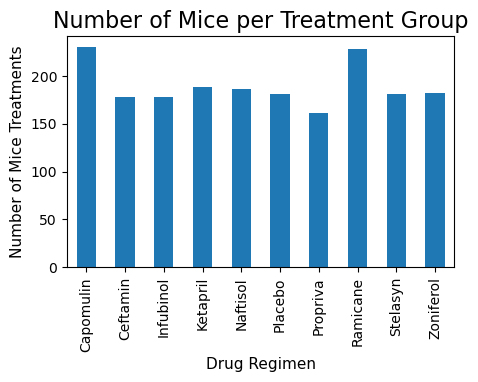

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = combined_df.groupby(["Drug Regimen"]).count()
mice_per_drug = mice_count["Mouse ID"]

plt.title("Number of Mice per Treatment Group",fontsize = 16)
plt.xlabel("Drug Regimen",fontsize = 11)
plt.ylabel("Number of Mice Treatments",fontsize = 11)
mice_per_drug.plot(kind="bar", figsize=(5,3))
plt.show()

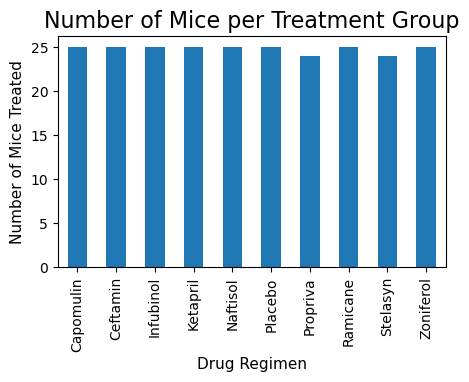

In [13]:
#As it wasn't clear to me whether a chart for just the number of mice or the total number of data points (each 
#timpepoint for each mouse), in addition to the above I have alos charted a graph for the number of mice to 
#demonstrate I can also complete that request if that is what is required. 
mice_count = cleaned_count_df.groupby(["Drug Regimen"]).count()
mice_per_drug = mice_count["Mouse ID"]

plt.title("Number of Mice per Treatment Group",fontsize = 16)
plt.xlabel("Drug Regimen",fontsize = 11)
plt.ylabel("Number of Mice Treated",fontsize = 11)
mice_per_drug.plot(kind="bar", figsize=(5,3))
plt.show()

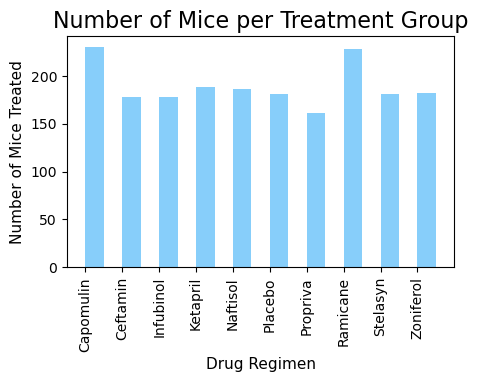

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_group = combined_df.groupby(["Drug Regimen"])

fig1, ax1 = plt.subplots(figsize=(5,3))
y_axis = drug_group["Mouse ID"].count()
x_axis = np.arange(len(y_axis))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                            "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.title("Number of Mice per Treatment Group",fontsize = 16)
plt.xlabel("Drug Regimen",fontsize = 11)
plt.ylabel("Number of Mice Treated",fontsize = 11)
plt.bar(x_axis, y_axis, color='lightskyblue', alpha=1, align="edge", width=0.5)
plt.xlim(-0.5, len(x_axis))
plt.show()

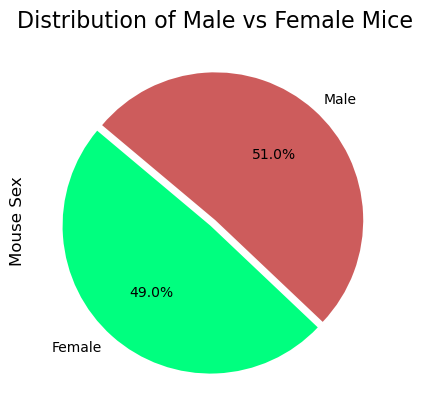

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.05, 0)
colors = ["springgreen", 'indianred']
mouse_sex = cleaned_df.groupby(["Sex"]).size().plot.pie(explode=explode, colors=colors, autopct="%1.1f%%", startangle=140)
mouse_sex.set_ylabel("Mouse Sex", fontsize=12)
mouse_sex.set_title("Distribution of Male vs Female Mice", fontsize=16)
plt.show()

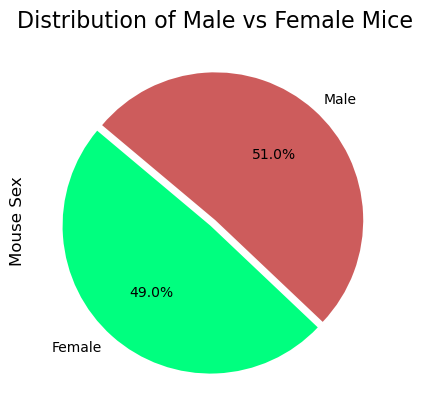

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = cleaned_df.groupby(["Sex"]).size()
labels = ["Male", "Female"]
plt.pie(mouse_sex, labels=["Female", "Male"], explode=explode, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Male vs Female Mice", fontsize=16)
plt.ylabel("Mouse Sex", fontsize=12)
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#"Capomulin", "Ramicane", "Infubinol", "Ceftamin"
treatment_regimen = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_volume_df = pd.merge(last_timepoint, cleaned_df, on=["Mouse ID", "Timepoint"], how="inner")
filtered_df = max_volume_df[max_volume_df["Drug Regimen"].isin(treatment_regimen)]

In [15]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatment_regimen:
    
    #locate the rows which contain mice on each drug and get the tumopr volumes
    tumor_vol = filtered_df.loc[filtered_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
        
    # add subset 
    tumor_vol_data.append(tumor_vol)   

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    if len(outliers) > 0: 
        print(f"There are potential outliers for {treatment} which are {outliers}")


There are potential outliers for Infubinol which are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


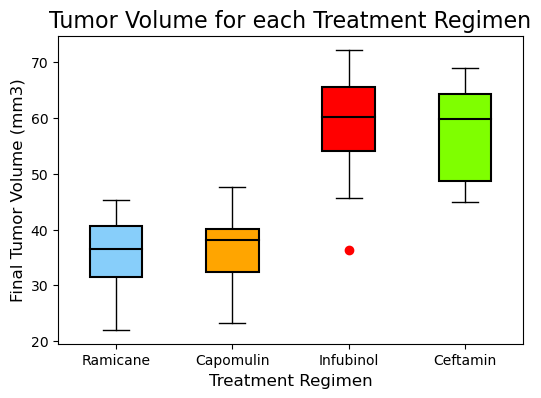

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
colors = ['lightskyblue', 'orange', 'red', 'chartreuse']
flier = dict(markerfacecolor='red', markeredgecolor='red', marker='o')
boxprops = dict(color="black",linewidth=1.5)
medianprops = dict(color="black",linewidth=1.5)

fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.set_title("Tumor Volume for each Treatment Regimen", fontsize = 16)
ax1.set_xlabel("Treatment Regimen", fontsize = 12)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize = 12)
box = ax1.boxplot(tumor_vol_data, labels=treatment_regimen, flierprops=flier, patch_artist=True,
                 boxprops=boxprops, medianprops = medianprops)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
   
plt.show()

## Line and Scatter Plots

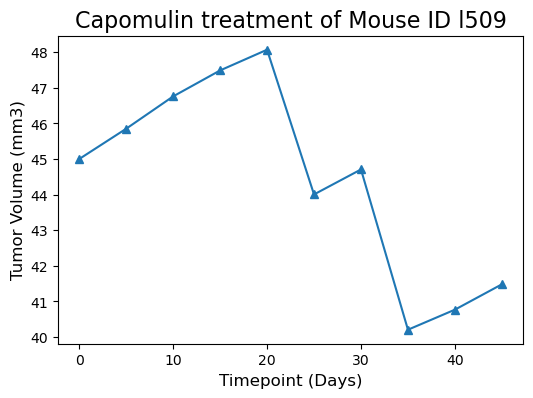

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]

#Select random mouse and obtain linked data 
mice_list = capomulin_df['Mouse ID'].tolist()
capo_mouse = random.choice(mice_list)
capo_mouse_data = capomulin_df.loc[capomulin_df['Mouse ID'] == capo_mouse]

fig1, ax1 = plt.subplots(figsize=(6, 4))
x_axis = capo_mouse_data['Timepoint']
y_axis = capo_mouse_data['Tumor Volume (mm3)']
plt.title(f"Capomulin treatment of Mouse ID {capo_mouse}", fontsize=16)
plt.xlabel("Timepoint (Days)",fontsize =12)
plt.ylabel("Tumor Volume (mm3)",fontsize =12)
plt.plot(x_axis, y_axis, marker='^')
plt.show()

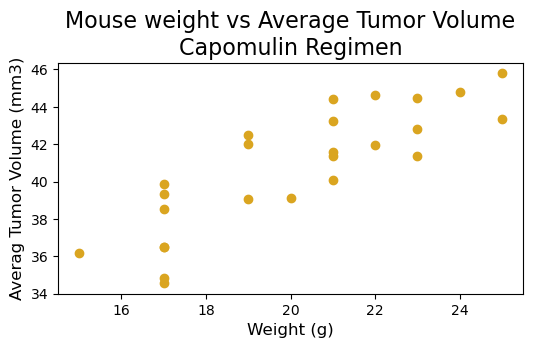

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_vol_df = capomulin_df.groupby(['Mouse ID']).mean()

fig1, ax1 = plt.subplots(figsize=(6, 3))
x_axis = avg_vol_df['Weight (g)']
y_axis = avg_vol_df['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis, color="goldenrod")
plt.title("Mouse weight vs Average Tumor Volume\nCapomulin Regimen",fontsize =16)
plt.xlabel("Weight (g)",fontsize =12)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =12)
plt.show()

## Correlation and Regression

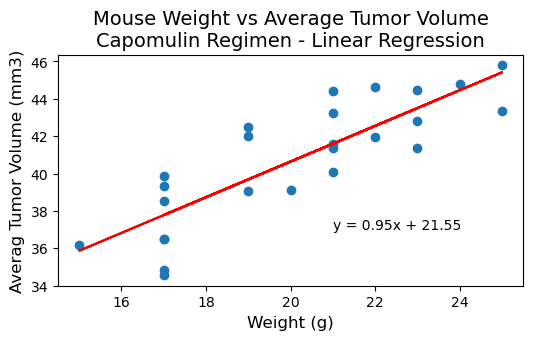

The r-squared is: 0.7088568047708723


In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_vol_df['Weight (g)']
y_values = avg_vol_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(6, 3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=10,color="tomato")
plt.title("Mouse Weight vs Average Tumor Volume\nCapomulin Regimen - Linear Regression",fontsize =14)
plt.xlabel("Weight (g)",fontsize =12)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =12)
plt.annotate(line_eq,(21,37),fontsize=10,color="black")
plt.show()
print(f"The r-squared is: {rvalue**2}")